# Hit-map for Simulation team
Author: Zhuoran Feng

First committed: 29/06/2020

Use the data from Simulation group (**data.dat**), made a simple hit map.

In [1]:
import numpy as np

data = np.loadtxt("data.dat", dtype=int, delimiter=";", usecols=1)
print(data)

[ 59 246 130 174  57 148 174 182 181 208 218  80 174 247 141  85 203 189
 182 166 167 206 170 157 205 193 131  38 183 198 234 241 245 243 145 219
 230 231  99  39 246 246 164 154 243 221 191 180 202 166 133 244 243 214
 224 173 243  31 161 161 216 235 127 212 201 169 169 132 159 159]


In [1]:
import Zip
import math
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import time, sys, pickle, math
from IPython.display import clear_output

# Channels in the detector
det_ch = { 'tpc': list(range(0, 247+1)), 'veto': list(range(248, 253+1)), 
          'sum_wv': [254], 'busy_on': [255], 'busy_off': [256],
          'hev_on': [257], 'hev_off': [258], 'muon_veto_trigger': [259], } 
n_channels = 260

# for reading the ini file
from configparser import ConfigParser, ExtendedInterpolation
config = ConfigParser(inline_comment_prefixes='#', interpolation=ExtendedInterpolation(), strict=True)
config.optionsxform = str
config.read('xenon1t.ini')

ch_top = eval(config['DEFAULT']['channels_top'])
ch_bottom = eval(config['DEFAULT']['channels_bottom'])
gain = eval(config['DEFAULT']['gains'])

# Initial parameters
baseline_ = 16384. * np.ones(n_channels)
std_ = 2.3 * np.ones(n_channels)

# The data files
NG = Zip.ReadZipped("/data/nikhefproject/data/xenon1t/NG") # Neutron data
Rn220 = Zip.ReadZipped("/data/nikhefproject/data/xenon1t/Rn220") # Rn-220 data

In [3]:
hit_top = []
hit_bottom = []

for point in data:
    if point in ch_top:
        hit_top.append(point)
    else:
        hit_bottom.append(point)
print(hit_top)
print(hit_bottom)

[59, 57, 80, 85, 38, 99, 39, 31]
[246, 130, 174, 148, 174, 182, 181, 208, 218, 174, 247, 141, 203, 189, 182, 166, 167, 206, 170, 157, 205, 193, 131, 183, 198, 234, 241, 245, 243, 145, 219, 230, 231, 246, 246, 164, 154, 243, 221, 191, 180, 202, 166, 133, 244, 243, 214, 224, 173, 243, 161, 161, 216, 235, 127, 212, 201, 169, 169, 132, 159, 159]


In [4]:
#adc_corrected, x, y, for each PMT for one event
xhist = []
yhist = []
for ch in hit_bottom:
#for ch in hit_top:
    pmt = eval(config['DEFAULT']['pmts'])
    x = pmt[ch]['position']['x']
    y = pmt[ch]['position']['y']
    xhist.append(x)
    yhist.append(y)
    

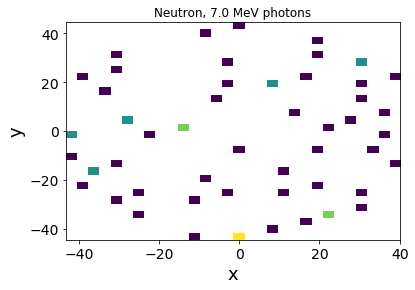

In [5]:
fig, ax = plt.subplots()
ax.hist2d(xhist,yhist, bins=(30,30), norm=mpl.colors.LogNorm())
ax.set_xlabel("x", fontsize = 18)
ax.set_ylabel("y", fontsize = 18)
ax.set_title('Neutron, 7.0 MeV photons')
ax.tick_params(axis = 'both', labelsize = 14)
fig.savefig('HitMap_Simulation.png', dpi = 200)

In [7]:
data_10 = np.loadtxt("data_10.0MeV_neutron.dat", dtype=int, delimiter=";", usecols=1)

hit_top_10 = []
hit_bottom_10 = []

for point in data_10:
    if point in ch_top:
        hit_top_10.append(point)
    else:
        hit_bottom_10.append(point)
print(hit_top_10)
print(hit_bottom_10)

[60, 60, 0, 84, 104, 85, 60, 52, 74, 59, 57, 25, 88, 88, 67, 92, 29, 104, 40, 122, 62, 59, 60, 84, 116, 104, 58, 106, 41, 125, 59, 59, 31, 79, 104, 94, 58, 58, 93, 73, 93, 73, 93, 66, 61, 54, 119, 60, 40, 87, 126, 56, 86, 97, 28, 58, 109, 31, 57, 83, 61, 58, 76, 42, 118, 103, 103, 77, 106, 73, 52, 23, 83, 84, 51, 59, 59, 61, 100, 93, 104, 75, 66, 80, 42, 60, 14, 21, 59, 75, 66, 80, 98, 91, 102, 95, 106, 99, 92, 74, 79, 56, 28, 72, 77, 37, 71, 30, 36, 85, 101, 101, 86, 104, 121, 77, 62, 100, 124, 102, 95, 105, 82, 29, 29, 25, 38, 57, 101, 103, 86, 114, 23, 75, 48, 119, 28, 60, 58, 6, 8, 56, 84, 25, 65, 57, 125, 117, 85, 81, 84, 31, 58, 121, 125, 60, 108, 114, 114, 57, 84, 70, 75, 28, 65, 38, 73, 29, 59, 115, 115, 21, 27, 32, 61, 54, 56, 52, 13, 110, 59, 106, 84, 86, 11, 59, 84, 63, 63, 89, 59, 67, 61, 25, 65, 65, 125, 118, 57, 105, 85, 120, 119, 85, 85, 61, 51, 123, 40, 38, 104, 110, 33, 92, 115, 61, 123, 59, 89, 122, 87, 121, 81, 60, 58, 98, 118, 21, 111, 103, 49, 101, 120, 79, 73, 125

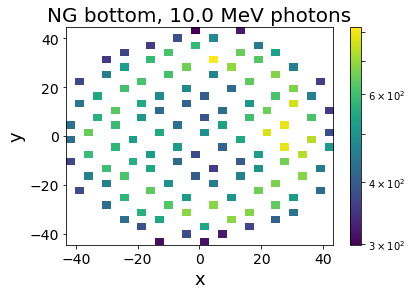

In [15]:
#adc_corrected, x, y, for each PMT for one event
xhist10 = []
yhist10 = []
pmt = eval(config['DEFAULT']['pmts'])
for ch in hit_bottom_10:
#for ch in hit_top:
    
    x = pmt[ch]['position']['x']
    y = pmt[ch]['position']['y']
    xhist10.append(x)
    yhist10.append(y)

fig2, ax2 = plt.subplots()
h2 = ax2.hist2d(xhist10,yhist10, bins=(30,30), norm=mpl.colors.LogNorm())
ax2.set_xlabel("x", fontsize = 18)
ax2.set_ylabel("y", fontsize = 18)
ax2.set_title('NG bottom, 10.0 MeV photons', fontsize = 20)
ax2.tick_params(axis = 'both', labelsize = 14)
fig2.colorbar(h2[3], ax = ax2)
fig2.savefig('HitMap_Simulation10_bottom.png', bbox_inches = 'tight')

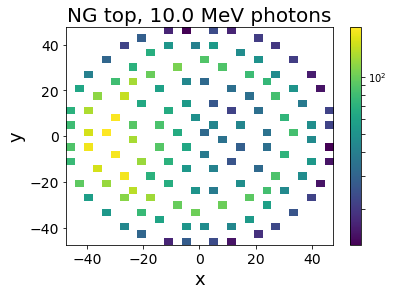

In [9]:
#adc_corrected, x, y, for each PMT for one event
xhist102 = []
yhist102 = []
pmt = eval(config['DEFAULT']['pmts'])
for ch in hit_top_10:
#for ch in hit_top:
    
    x = pmt[ch]['position']['x']
    y = pmt[ch]['position']['y']
    xhist102.append(x)
    yhist102.append(y)

fig22, ax22 = plt.subplots()
h22 = ax22.hist2d(xhist102,yhist102, bins=(30,30), norm=mpl.colors.LogNorm())
ax22.set_xlabel("x", fontsize = 18)
ax22.set_ylabel("y", fontsize = 18)
ax22.set_title('NG top, 10.0 MeV photons', fontsize = 20)
ax22.tick_params(axis = 'both', labelsize = 14)
fig22.colorbar(h22[3], ax = ax22)
fig22.savefig('HitMap_Simulation10_top.png', dpi = 200)

In [2]:
data_new = np.loadtxt("data_2.2MeV_neutron_200khits_18events.dat", dtype=int, delimiter=";", usecols=1)

hit_top_new = []
hit_bottom_new = []

for point in data_new:
    if point in ch_top:
        hit_top_new.append(point)
    else:
        hit_bottom_new.append(point)
print(len(hit_top_new))
print(len(hit_bottom_new))

17423
182577


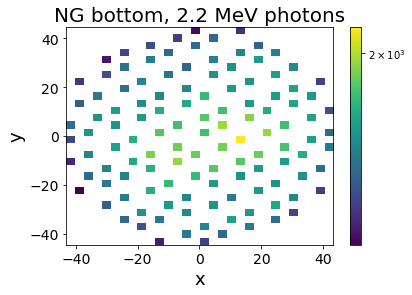

In [10]:
#adc_corrected, x, y, for each PMT for one event
xhistnew = []
yhistnew = []
pmt = eval(config['DEFAULT']['pmts'])
for ch in hit_bottom_new:
#for ch in hit_top:
    
    x = pmt[ch]['position']['x']
    y = pmt[ch]['position']['y']
    xhistnew.append(x)
    yhistnew.append(y)

fig3, ax3 = plt.subplots()
h3 = ax3.hist2d(xhistnew,yhistnew, bins=(30,30), norm=mpl.colors.LogNorm())
ax3.set_xlabel("x", fontsize = 18)
ax3.set_ylabel("y", fontsize = 18)
ax3.set_title('NG bottom, 2.2 MeV photons', fontsize = 20)
ax3.tick_params(axis = 'both', labelsize = 14)
fig3.colorbar(h3[3], ax = ax3)
fig3.savefig('HitMap_Simulation22_bottom.png', dpi = 200)

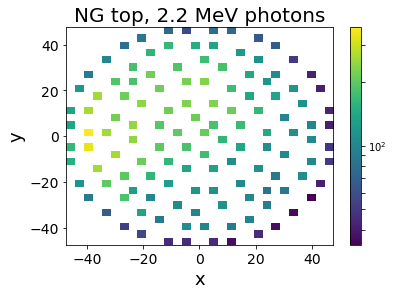

In [14]:
#adc_corrected, x, y, for each PMT for one event
xhistnew2 = []
yhistnew2 = []
pmt = eval(config['DEFAULT']['pmts'])
for ch in hit_top_new:

    
    x = pmt[ch]['position']['x']
    y = pmt[ch]['position']['y']
    xhistnew2.append(x)
    yhistnew2.append(y)

fig32, ax32 = plt.subplots()
h32 = ax32.hist2d(xhistnew2,yhistnew2, bins=(30,30), norm=mpl.colors.LogNorm())
ax32.set_xlabel("x", fontsize = 18)
ax32.set_ylabel("y", fontsize = 18)
ax32.set_title('NG top, 2.2 MeV photons', fontsize = 20)
ax32.tick_params(axis = 'both', labelsize = 14)
fig32.colorbar(h32[3], ax = ax32)
fig32.savefig('HitMap_Simulation22_top.png', bbox_inches = 'tight')